In [14]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [6]:
# Load the data
data = pd.read_csv('../dataset/500hits.csv', encoding='latin1')
data = data.drop('PLAYER', axis=1)
X  = data.drop('HOF', axis=1)
y = data['HOF']

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
scaler = StandardScaler()
scaled_x = scaler.fit_transform(X_train)
X_train = pd.DataFrame(scaled_x, columns=X.columns)
print(X_train.describe().round(3))

           YRS        G       AB        R        H       2B       3B       HR  \
count  372.000  372.000  372.000  372.000  372.000  372.000  372.000  372.000   
mean    -0.000    0.000    0.000    0.000    0.000    0.000   -0.000   -0.000   
std      1.001    1.001    1.001    1.001    1.001    1.001    1.001    1.001   
min     -2.122   -1.998   -1.582   -1.879   -1.226   -2.138   -1.459   -1.274   
25%     -0.710   -0.696   -0.761   -0.737   -0.789   -0.714   -0.790   -0.851   
50%     -0.004   -0.169   -0.227   -0.167   -0.221   -0.160   -0.237   -0.193   
75%      0.702    0.582    0.519    0.521    0.450    0.576    0.629    0.645   
max      3.174    3.507    3.755    3.944    3.869    4.299    3.636    3.860   

           RBI       BB       SO       SB       CS       BA  
count  372.000  372.000  372.000  372.000  372.000  372.000  
mean     0.000    0.000    0.000    0.000   -0.000   -0.000  
std      1.001    1.001    1.001    1.001    1.001    1.001  
min     -1.781   -1.65

In [12]:
pca1 = PCA()
X_pca1 = pca1.fit_transform(X_train)
print(pca1.explained_variance_ratio_)

[4.22448478e-01 2.36582583e-01 1.06085103e-01 6.90539321e-02
 5.53473687e-02 3.12393498e-02 2.16795389e-02 2.06023604e-02
 1.69824087e-02 9.19751096e-03 5.50710620e-03 4.23116668e-03
 9.07192285e-04 1.35900385e-04]


Text(0.5, 1.0, 'Explained Variance vs Number of Components')

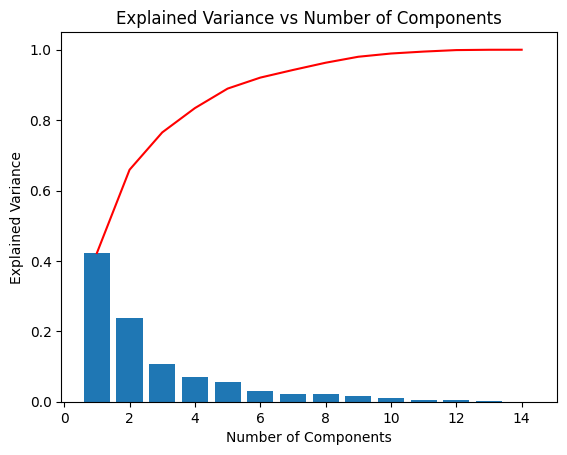

In [16]:
# Cumulative Explained Variance
plt.bar(range(1, len(pca1.explained_variance_ratio_)+1), pca1.explained_variance_ratio_)
plt.ylabel('Explained Variance')
plt.xlabel('Number of Components')
plt.plot(range(1, len(pca1.explained_variance_ratio_)+1), np.cumsum(pca1.explained_variance_ratio_), c='red', label='Cumulative Explained Variance')
plt.title('Explained Variance vs Number of Components')

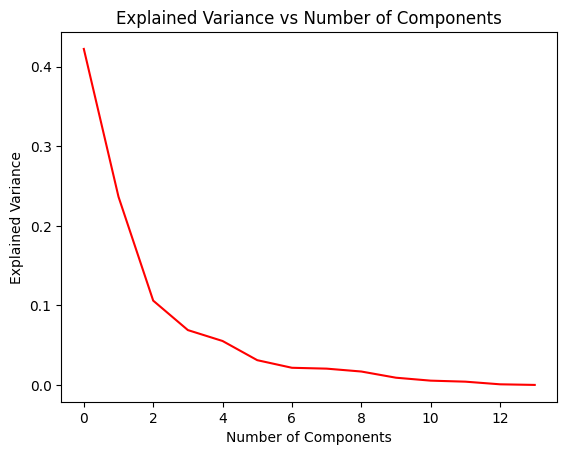

In [18]:
plt.plot(pca1.explained_variance_ratio_, c='red', label='Explained Variance')
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance')
plt.title('Explained Variance vs Number of Components')
plt.show()

In [20]:
pca2 = PCA(n_components=0.95)
X_pca2 = pca2.fit_transform(X_train)
print(X_pca2.shape)
print(pca2.explained_variance_ratio_)

(372, 8)
[0.42244848 0.23658258 0.1060851  0.06905393 0.05534737 0.03123935
 0.02167954 0.02060236]


(372, 2)
[0.42244848 0.23658258]


C:\Users\Tymur_Hilfatullin\AppData\Local\Temp\ipykernel_34384\1136071670.py:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colormap = plt.cm.get_cmap('coolwarm', 2)


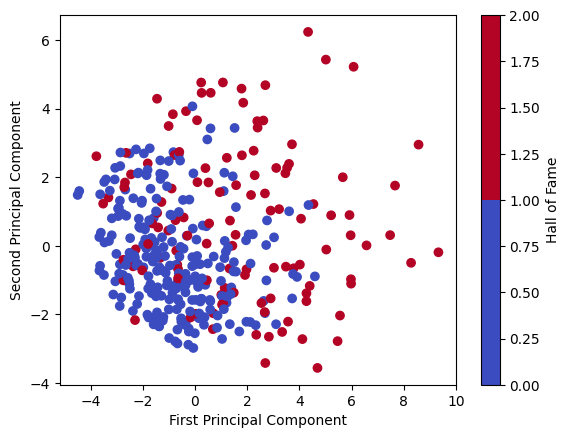

In [21]:
pca_2c = PCA(n_components=2)
X_pca_2c = pca_2c.fit_transform(X_train)
print(X_pca_2c.shape)
print(pca_2c.explained_variance_ratio_)

colormap = plt.cm.get_cmap('coolwarm', 2)
plt.figure()
scatter = plt.scatter(X_pca_2c[:, 0], X_pca_2c[:, 1], c=y_train, cmap=colormap)
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.colorbar(scatter, label='Hall of Fame')
plt.show()

In [22]:
pca_3c = PCA(n_components=3)
X_pca_3c = pca_3c.fit_transform(X_train)
print(X_pca_3c.shape)

(372, 3)


C:\Users\Tymur_Hilfatullin\AppData\Local\Temp\ipykernel_34384\1268434150.py:10: UserWarning: Adding colorbar to a different Figure <Figure size 640x480 with 3 Axes> than <Figure size 640x480 with 1 Axes> which fig.colorbar is called on.
  plt.colorbar(scatter, label='Hall of Fame')


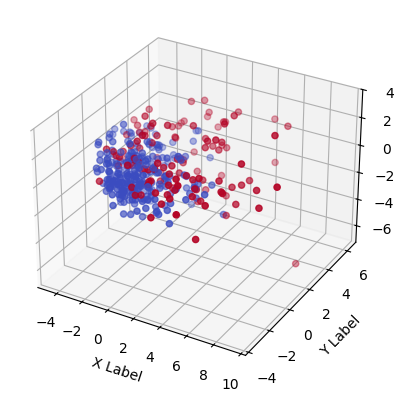

In [23]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_pca_3c[:, 0], X_pca_3c[:, 1], X_pca_3c[:, 2], c=y_train, cmap=colormap)
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
plt.colorbar(scatter, label='Hall of Fame')
plt.show()